In [1]:
load('../sim_data/independent_RF_janitza.RData')

In [2]:
table_ind = NULL
tmp_num_select = rep(0, length(results_ind_rf))
for (i in 1:length(results_ind_rf)){
    results_ind_rf[[i]]$OOB = paste(round(mean(results_ind_rf[[i]]$OOB.list, na.rm=T),2),
                                    '(', round(FSA::se(results_ind_rf[[i]]$OOB.list, na.rm=T),2), ')')
    table_ind = rbind(table_ind, results_ind_rf[[i]][c('n', 'p', 'rou', 'FP', 'FN', 'MSE', 'Stab', 'OOB')])
    tmp_num_select[i] = mean(rowSums(results_ind_rf[[i]]$Stab.table))
}
table_ind = as.data.frame(table_ind)
table_ind$num_select = tmp_num_select

In [3]:
# export result
result.table_ind <- apply(table_ind,2,as.character)
rownames(result.table_ind) = rownames(table_ind)
result.table_ind = as.data.frame(result.table_ind)

# extract numbers only for 'n' & 'p'
result.table_ind$n = tidyr::extract_numeric(result.table_ind$n)
result.table_ind$p = tidyr::extract_numeric(result.table_ind$p)
result.table_ind$ratio = result.table_ind$p / result.table_ind$n

result.table_ind = result.table_ind[c('n', 'p', 'ratio', 'Stab', 'MSE', 'FP', 'FN', 'OOB', 'num_select')]
colnames(result.table_ind)[1:3] = c('N', 'P', 'Ratio')
#rownames(result.table_ind) = NULL # tried different ways; not working
result.table_ind$Index = seq(1, length(results_ind_rf), 1)

extract_numeric() is deprecated: please use readr::parse_number() instead
extract_numeric() is deprecated: please use readr::parse_number() instead


In [4]:
# convert interested measurements to be numeric
result.table_ind$Stab = as.numeric(as.character(result.table_ind$Stab))
result.table_ind$MSE_mean = as.numeric(substr(result.table_ind$MSE, start=1, stop=4))
result.table_ind$FP_mean = as.numeric(substr(result.table_ind$FP, start=1, stop=4))
result.table_ind$FN_mean = as.numeric(substr(result.table_ind$FN, start=1, stop=4))
result.table_ind$OOB_mean = as.numeric(substr(result.table_ind$OOB, start=1, stop=4))
result.table_ind$num_select = as.numeric(as.character(result.table_ind$num_select))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [5]:
result.table_ind

N,P,Ratio,Stab,MSE,FP,FN,OOB,num_select,Index,MSE_mean,FP_mean,FN_mean,OOB_mean
50,50,1.00,0.02,4.3 ( 0.2 ),2.41 ( 0.21 ),5.22 ( 0.09 ),2.08 ( 0.02 ),3.05,1,4.30,2.41,5.22,2.08
100,50,0.50,0.18,3.22 ( 0.11 ),2.63 ( 0.21 ),3.84 ( 0.11 ),1.78 ( 0.01 ),4.77,2,3.22,2.63,3.84,1.78
500,50,0.10,0.49,1.94 ( 0.03 ),3.08 ( 0.27 ),1.07 ( 0.08 ),1.31 ( 0 ),8.01,3,1.94,3.08,1.07,1.31
1000,50,0.05,0.57,1.53 ( 0.01 ),3.26 ( 0.26 ),0.2 ( 0.04 ),1.17 ( 0 ),9.06,4,1.53,3.26,0.20,1.17
50,100,2.00,0.01,4.04 ( 0.19 ),5.04 ( 0.36 ),5.31 ( 0.08 ),2.23 ( 0.02 ),5.71,5,4.04,5.04,5.31,2.23
100,100,1.00,0.10,3.38 ( 0.11 ),4.66 ( 0.29 ),4.09 ( 0.1 ),2.02 ( 0.01 ),6.57,6,3.38,4.66,4.09,2.02
500,100,0.20,0.34,2.65 ( 0.03 ),6.53 ( 0.38 ),1.08 ( 0.07 ),1.54 ( 0 ),11.45,7,2.65,6.53,1.08,1.54
1000,100,0.10,0.40,2.31 ( 0.02 ),6.77 ( 0.39 ),0.27 ( 0.05 ),1.39 ( 0 ),12.50,8,2.31,6.77,0.27,1.39
50,500,10.00,0.03,4.02 ( 0.2 ),26.76 ( 0.75 ),4.84 ( 0.09 ),2.47 ( 0.03 ),27.92,9,4.02,26.70,4.84,2.47
100,500,5.00,0.02,3.9 ( 0.13 ),26.32 ( 0.91 ),4.5 ( 0.08 ),2.42 ( 0.02 ),27.82,10,3.90,26.30,4.50,2.42


In [8]:
## export
write.table(result.table_ind, '../results_summary/sim_ind_rf_jnt.txt', sep='\t', row.names=F)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“Removed 1 rows containing missing values (geom_point).”

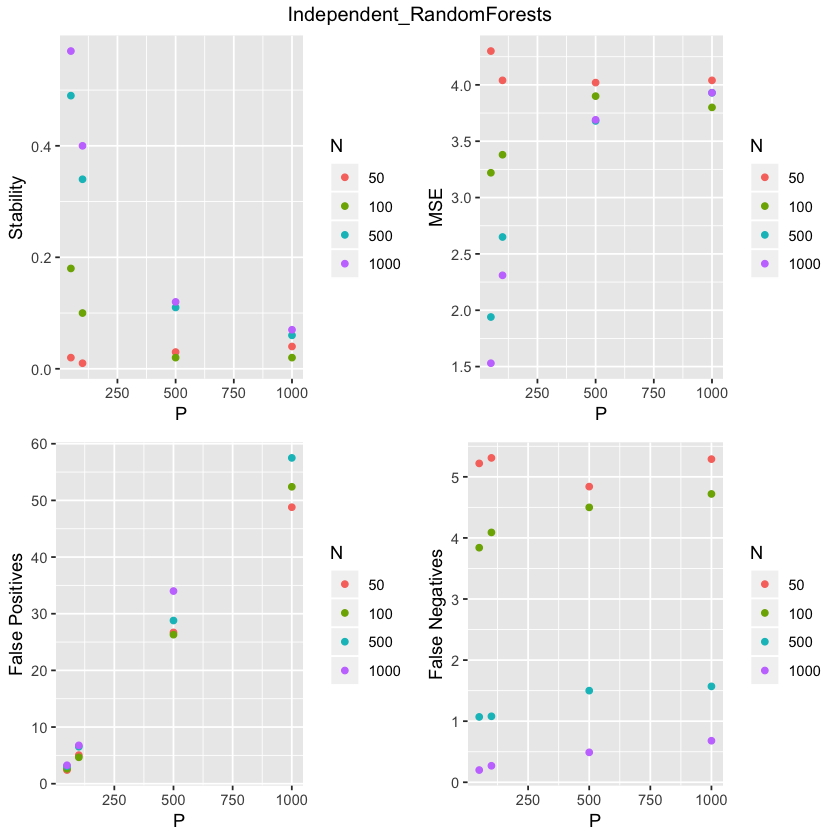

In [7]:
library(ggplot2)
library(gridExtra)
#pdf('../figures_sim/figure_independent_rf_jnt.pdf', height=5, width=7)
result.table_ind$N = as.factor(result.table_ind$N)
fig_ind_stab = ggplot(result.table_ind, aes(x=P, y=Stab, color=N)) + geom_point() + ylab('Stability')
fig_ind_mse = ggplot(result.table_ind, aes(x=P, y=MSE_mean, color=N)) + geom_point() + ylab('MSE')
fig_ind_fp = ggplot(result.table_ind, aes(x=P, y=FP_mean, color=N)) + geom_point() + ylab('False Positives')
fig_ind_fn = ggplot(result.table_ind, aes(x=P, y=FN_mean, color=N)) + geom_point() + ylab('False Negatives')
grid.arrange(fig_ind_stab, fig_ind_mse, fig_ind_fp, fig_ind_fn, ncol=2, top='Independent_RandomForests')
#dev.off()

In [ ]:
# summary: Janitza method has better stability yet much worse MSE than Altman (still much lower stab than others)
# since Janitza is not applied to all data structures, we don't consider it any more